In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/jycha/Downloads/AI-class-main/AI-class-main/titanic.csv", index_col = 0)

In [3]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

3    491
1    216
2    184
Name: Pclass, dtype: int64

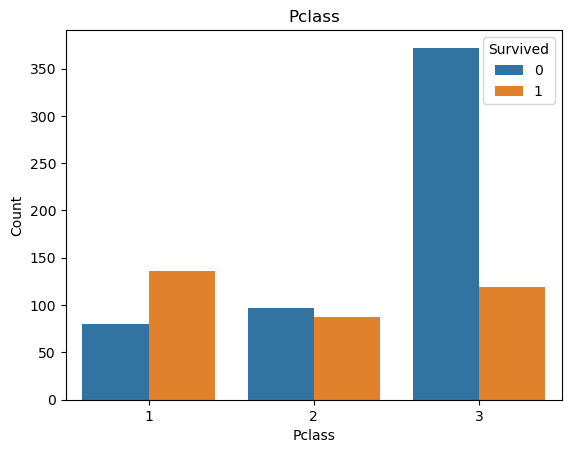

In [5]:
# Survived를 타겟 레이블로 삼아서 EDA 수행

# 1. Pclass 레이블별 갯수 및 차트표시

sns.countplot(data = data, x="Pclass", hue='Survived')
plt.title("Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
data['Pclass'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

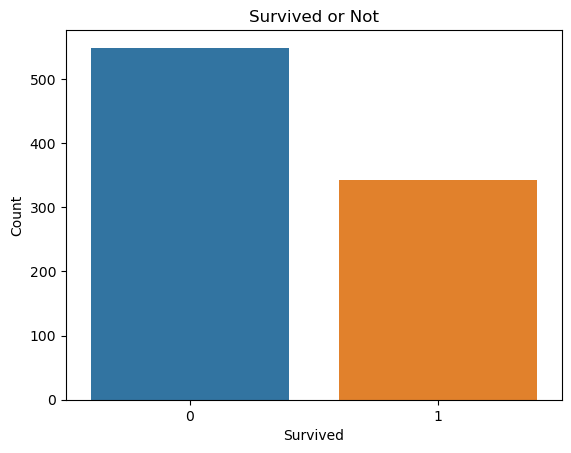

In [6]:
# 2. 생존자와 사망자 총 숫자 및 차트표시

sns.countplot(data = data, x="Survived")
plt.title("Survived or Not")
plt.xlabel("Survived")
plt.ylabel("Count")
data['Survived'].value_counts()

In [7]:
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.Sex)
data['Sex'] = le.transform(data['Sex'])

In [8]:
data['Sex']

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int32

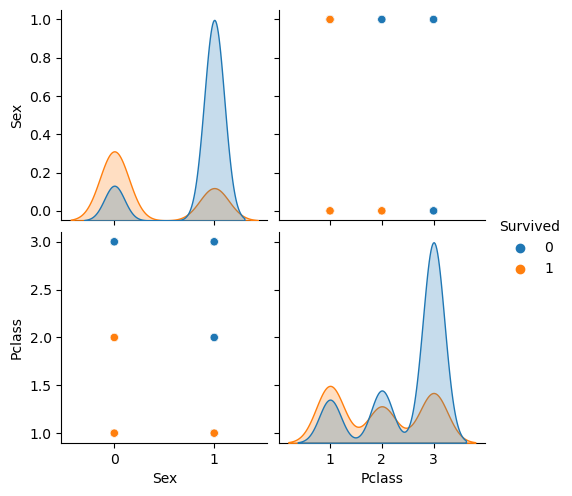

In [9]:
# pairplot 이용한 상관관계분석

sns.pairplot(data,
             vars=['Sex', 'Pclass'],
            hue ='Survived')
plt.show()

In [10]:
# heatmap 이용한 상관관계분석

titanic_data = data[['Survived', 'Sex', 'Pclass']]

<AxesSubplot:title={'center':'Analzye Correlation of Features'}>

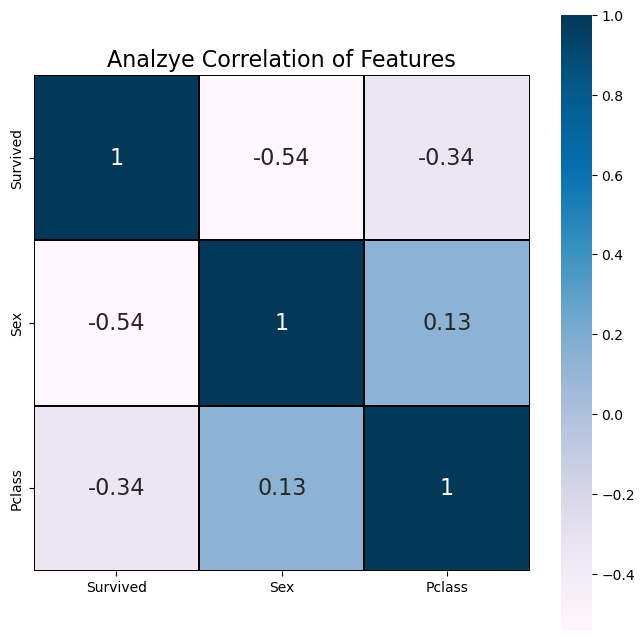

In [11]:
colormap = plt.cm.PuBu
plt.figure(figsize=(8, 8))
plt.title("Analzye Correlation of Features", y = 1.0, size = 16)
sns.heatmap(titanic_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16})

In [12]:
# 결측치 제거(채우기)

x=data
x['Age'].fillna(x['Age'].median(), inplace = True)
x=x.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y=data['Survived']

In [13]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000
888,1,0,19.0,0,0,30.0000
889,3,0,28.0,1,2,23.4500


In [14]:
x.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [15]:
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7206703910614525
[[104   6]
 [ 44  25]]


In [17]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8100558659217877
[[93 17]
 [17 52]]


In [18]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7821229050279329
[[94 16]
 [23 46]]


In [19]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8324022346368715
[[99 11]
 [19 50]]


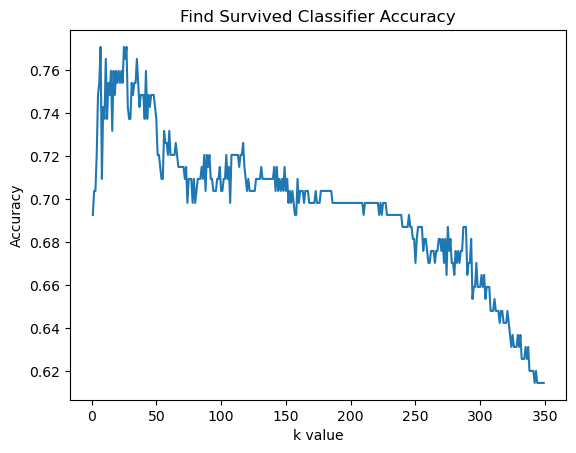

In [20]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 350)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Survived Classifier Accuracy")
plt.show()